In [10]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib.animation as animation
from gol_structures import *

np.random.seed(6)

progression = []
rows = 50
cols = 50

size = (rows,cols)

prob_0 = 0.8              

# Random initialization of the 2D environment
x = np.random.choice([0, 1], size=size, p=[prob_0, 1-prob_0])

#x = np.zeros(size)
#x = add_glider_gun(x, 5, 5)
#x = add_eater(x, 20, 40)
prev = x.copy()
progression.append(prev)

steps = 500

for t in range(steps):
    for r in range(rows):
        for c in range(cols):
            total = 0
            # Count how many are in its neighborhood
            for rn in [i%rows for i in range(r-1, r+2)]:
                for cn in [i%cols for i in range(c-1, c+2)]:
                    total += prev[rn, cn]
            # Subtract myself
            total -= prev[r,c]
            if (prev[r,c] == 0 and total == 3):
                x[r,c] = 1
            elif (prev[r,c] == 1 and total != 2 and total != 3):
                x[r,c] = 0

    # Keep track of the progression for animation        
    prev = x.copy()
    progression.append(prev)


<IPython.core.display.Javascript object>


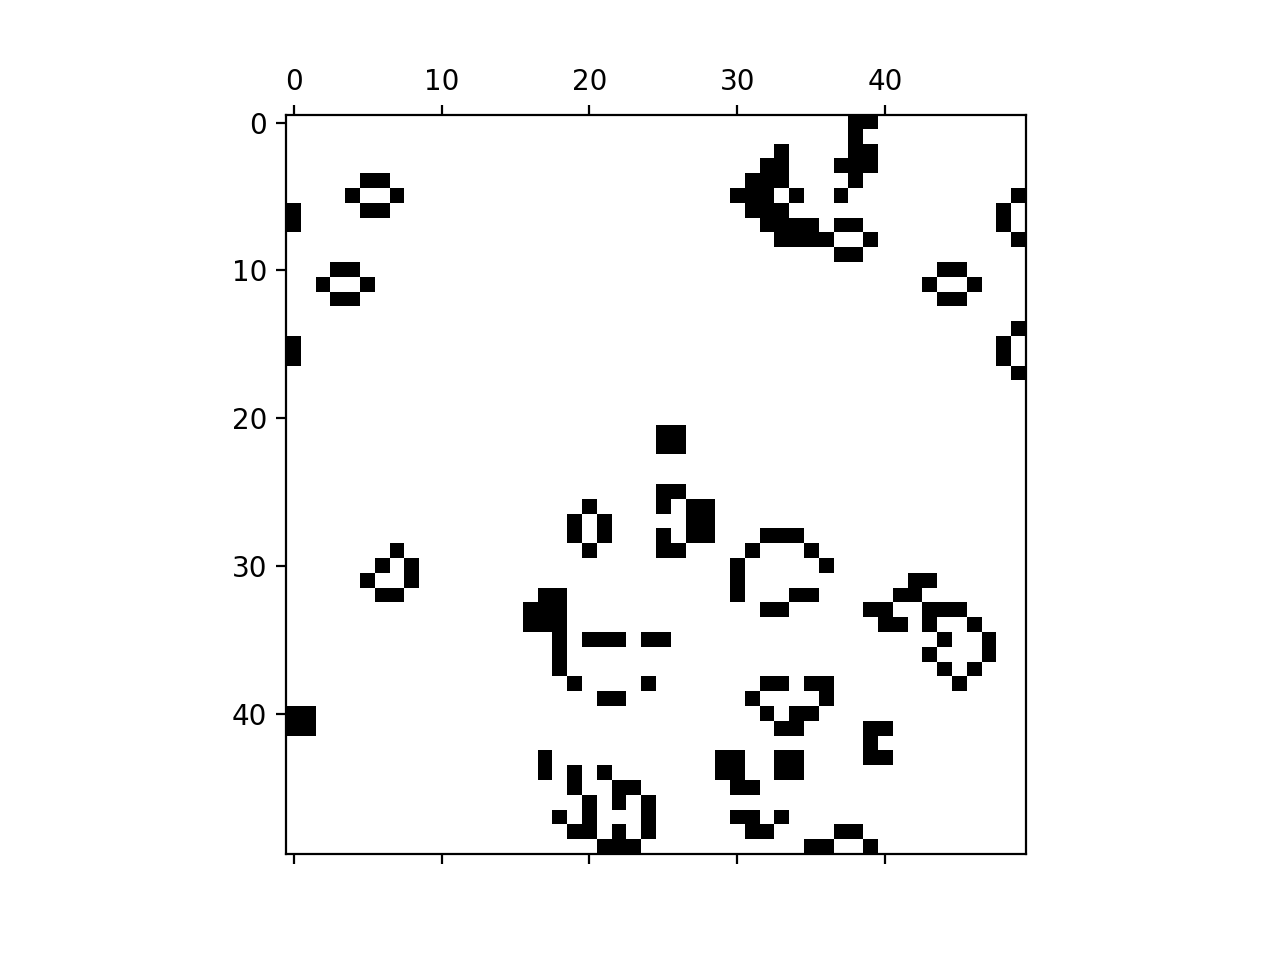

In [11]:
def update(i):
    mat.set_data(progression[i])
    
fig, ax = plt.subplots()
mat = ax.matshow(progression[0], cmap='binary')
ani = animation.FuncAnimation(fig, update, interval=50, frames=steps, repeat=False)
plt.show()